In [12]:
# Import needed packages
# You may add or remove packages should you need them
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import KFold, LeaveOneOut, cross_val_score, train_test_split

# Set random seed
np.random.seed(0)

# Display plots inline and change plot resolution to retina
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# Set Seaborn aesthetic parameters to defaults
sns.set()

In [2]:
# Load the Iris dataset included with scikit-learn
iris = load_iris()

In [4]:
# Put data in a pandas DataFrame
data = pd.DataFrame(iris['data'], columns=iris['feature_names'])

In [6]:
# Add target and class to DataFram
data['target'] = iris['target']

In [7]:
data.sample(10) # Show 10 random samples

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
114,5.8,2.8,5.1,2.4,2
62,6.0,2.2,4.0,1.0,1
33,5.5,4.2,1.4,0.2,0
107,7.3,2.9,6.3,1.8,2
7,5.0,3.4,1.5,0.2,0
100,6.3,3.3,6.0,2.5,2
40,5.0,3.5,1.3,0.3,0
86,6.7,3.1,4.7,1.5,1
76,6.8,2.8,4.8,1.4,1
71,6.1,2.8,4.0,1.3,1


In [8]:
# now... implement the LDA (bear in mind that you do pass it the y's and it is supervised!)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()


In [36]:
# same process as always, identify your X's and your y's
X = data.drop('target', axis=1)
y = data['target']
X.shape

(150, 4)

In [99]:
#train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=0)

In [93]:
# Scale the X's
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [94]:
# apply the lda transformation
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.fit_transform(X_test, y_test)
X_train.shape

(120, 2)

In [95]:
# select 2 principal components
pc1, pc2 = X_train[:,0], X_train[:,1]

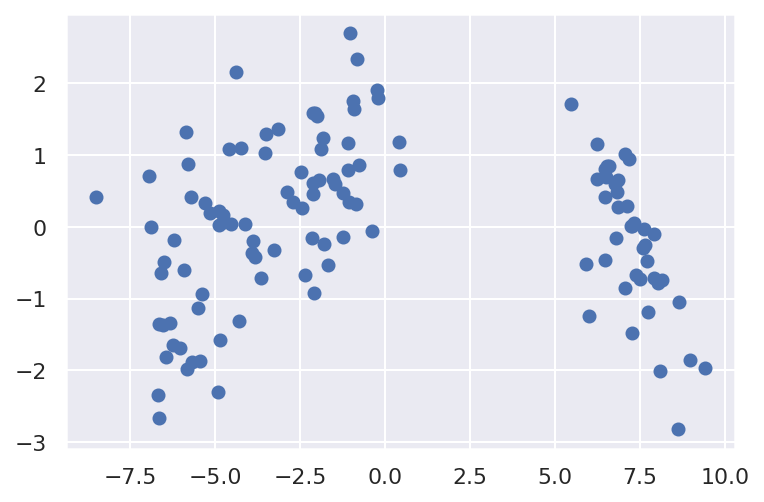

In [96]:
# take a look at the new axes for the data and plot them
plt.figure()
plt.scatter(pc1, pc2)

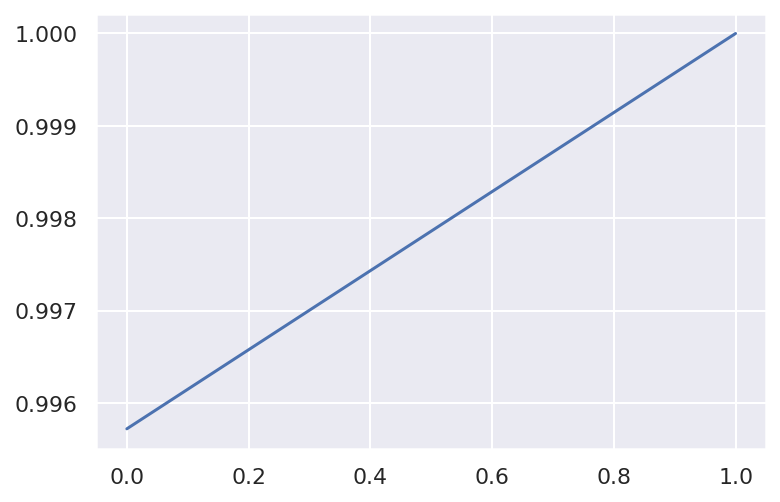

In [97]:
# what about the variability?
plt.figure()
plt.plot(np.cumsum(lda.explained_variance_ratio_))

In [100]:
from sklearn.ensemble import RandomForestClassifier
#without lda and without normalization
classifier = RandomForestClassifier(max_depth=2, random_state=3)

classifier.fit(X_train, y_train)
print(classifier.score(X_train, y_train))
print(classifier.score(X_test, y_test))

0.9583333333333334
0.9333333333333333


In [85]:
# Run a Random Forest Classifier with the transformed data
from sklearn.ensemble import RandomForestClassifier
#without lda, with normalization
classifier = RandomForestClassifier(max_depth=2, random_state=3)

classifier.fit(X_train, y_train)
print(classifier.score(X_train, y_train))
print(classifier.score(X_test, y_test))

0.9583333333333334
0.9666666666666667


In [89]:
#Check the new acuracy! Is it higher or lower than what you obtain selecting 2 features and applying a Random Forest Directly?
from sklearn.ensemble import RandomForestClassifier
# with lda and normalization
classifier = RandomForestClassifier(max_depth=2, random_state=3)

classifier.fit(X_train, y_train)
print(classifier.score(X_train, y_train))
print(classifier.score(X_test, y_test))

0.9666666666666667
0.9666666666666667


In [98]:
from sklearn.ensemble import RandomForestClassifier
# with lda, but X_test = lda.fit_transform(X_test, y_test)
classifier = RandomForestClassifier(max_depth=2, random_state=3)

classifier.fit(X_train, y_train)
print(classifier.score(X_train, y_train))
print(classifier.score(X_test, y_test))

0.9666666666666667
0.8666666666666667
